In [144]:
import numpy as np
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

# Get the data 

In [145]:
# in this file is the url to the spreadsheet with the data
# PIGLEG_SPREADSHEET_URL=https://docs.google.com/spreadsheets/d/1G55kXxcJ0...piLaK0snddRU-jzU/edit?usp=sharing
env_paths = list(Path(".").glob("../**/.env.dev"))
print(env_paths)
# find line with PIGLEG_SPREADSHEET_URL and give me the value after the "="
PIGLEG_SPREADSHEET_URL = [line.split("=", 1)[1].strip() for line in open(env_paths[0], "r") if line.startswith("PIGLEG_SPREADSHEET_URL")][0]
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("\"", "")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?usp=sharing", "export?format=csv")
# PIGLEG_SPREADSHEET_URL

[WindowsPath('../.env.dev')]


In [146]:
import pandas as pd
url = PIGLEG_SPREADSHEET_URL
df = pd.read_csv(url)

C:\Users\Jirik\AppData\Local\Temp\ipykernel_3416\795014733.py:3: DtypeWarning:

Columns (21,22,28,29,30,32,33,34,35,36,37,39,40,41,42,43,44,45,46,49,55,67,68,78,81,85,86,87,88,89,90,91,92,93,112,113,114,115,116,117,124,154,174,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,234,235,236,237,238,239,251,257,259,270,271,272,273,274,275,282,283,284,285,286,287,293,299,312,313,314,315,316,317,323,324,325,326,327,328,329,330,331,332,333,334,336,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370,372,373,374,375,376,377,378,379,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,510,511,512,513,514,515,517,518,519,520,521,522,523,525,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,5

In [147]:
df.tail()

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Scissors stitch 10 unit,Scissors stitch 10 visibility [%],Scissors stitch 11 area presence [%],Scissors stitch 11 median area presence [%],Scissors stitch 12 area presence [%],Scissors stitch 12 median area presence [%],Scissors stitch 13 area presence [%],Scissors stitch 13 median area presence [%],Scissors stitch 14 area presence [%],Scissors stitch 14 median area presence [%]
2624,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 10:14:37,khalatbari.sadaf@gmail.com,2022-07-07 16:48,2024-06-26 11:40,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2625,"Gehrke,Yves - post.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 10:15:50,mjirik@kky.zcu.cz,2024-06-03 10:53,2024-06-27 08:15,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2626,"Gehrke,Yves - post.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 14:33:11,mjirik@kky.zcu.cz,2024-06-03 10:53,2024-06-27 12:33,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2627,Schiesser_David_post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 14:41:39,mjirik@kky.zcu.cz,2024-06-03 10:53,2024-06-26 12:17,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,Schiesser_David_post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 14:48:13,mjirik@kky.zcu.cz,2024-06-03 10:53,2024-06-27 12:48,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 10 unit', 'Scissors stitch 10 visibility [%]',
       'Scissors stitch 11 area presence [%]',
       'Scissors stitch 11 median area presence [%]',
       'Scissors stitch 12 area presence [%]',
       'Scissors stitch 12 median area presence [%]',
       'Scissors stitch 13 area presence [%]',
       'Scissors stitch 13 median area presence [%]',
       'Scissors stitch 14 area presence [%]',
       'Scissors stitch 14 median area presence [%]'],
      dtype='object', length=965)

In [149]:
## Select data

In [150]:
# filename_contains_list=[
#     "Angelique Runkel _Pretest.mp4", #B
#     "Angelique Runkel_Posttest.mp4",
#     "Aryan DadashzadehKhayyat_Pretest.mp4", #B
#     "Aryan DadashzadehKhayat_Posttest.mp4",
#     "Fehringer_Pascal__pre_test.mp4", #
#     "Fehringer_Pascal__post_test.mp4",
#     "Fischer_Tom_Pretest.mp4", #B
#     "Fischer_Tom-Posttest.mp4", #B
#     "Gehrke,Yves-Pretest.mp4", #B
#     "Gehrke,Yves - post.mp4",
#     "Glöß, Monique, Pretest 1-11.10.2021.mp4",
#     "Glöß, Monique_Posttest.mp4",
#     "Gremme_YvonnePretest1_11_10_2021.mp4", #B
#     "Gremme_Yvonne_Posttest.mp4",
#     "Große Nina__Pretest___11_10_2021.mp4", #B
#     "Große, Nina - Posttest.mp4",
#     "Hilger,Anke-Pretest1.mp4",
#     "Hilger,Anke-Posttest.mp4",
#     "Huster__Janik___Pre_Test.mp4", #B
#     "Huster__Janik_-_Post-Test.mp4",
#     "Jonas Marx_Pretest.mp4",
#     "Jonas Marx_Posttest.mp4",
#     "Kraus__Caroline_PreTest1.mp4", #B
#     "Kraus_Caroline_PostTest.mp4",
#     "Laura Bütow_Pretest.mp4", #B
#     "Laura Bütow_Posttest.mp4",
#     "Lausch_Laura_Pretest.mp4",
#     "Lausch_Laura-Posttest.mp4",
#     "Mader_Pretest.mp4", #B
#     "Mader_Posttest.mp4",
#     "Neitzel_Natalie_Pretest1.mp4",
#     "Neitzel_Natalie_Posttest.mp4",
#     "Porthaus, Michael_Pretest1_11_10_2021.mp4", #B
#     "Porthaus, Michael-Posttest.mp4",
#     "Pre_-Test_Isabel_Linden.mp4",
#     "Post_-Test_Isabel_Linden.mp4",
#     "Sarah Grimm PreTest1.mp4",
#     "Sarah Grimm post.mp4",
#     "Scheufler, Rebekka__Pretest_1__11_10_21.mp4", #
#     "Scheufler, Rebekka-Posttest.mp4", #
#     "Schiesser_David_pre_test.mp4",
#     "Schiesser_David_post_test.mp4",
#     "Spitze_Vanessa_PreTest.mp4", #B
#     "Spitze_Vanessa post.mp4",
#     "Volkers_Pr_Test1.mp4",
#     "Volkers post.mp4",
# ]

In [151]:
# df["collections"].str.contains("dataset 2024-06").values[-1]

In [152]:
# remove all records with filename NA or NaN
dfs = df[df["filename"].notna()]
dfs = dfs.copy()
print(len(dfs))

# take all records with filename containing "Good", "Medium", "Bad", if the filename is the same, take the last one

# dfs = dfs[dfs["filename"].str.contains("Good|Medium|Bad")].drop_duplicates(subset=["filename"], keep="last")

# take the records uploaded after 2024-02-01
# uploaded_at to datetime
dfs["uploaded_at"] = pd.to_datetime(dfs["uploaded_at"])
dfs["timestamp"] = pd.to_datetime(dfs["timestamp"])
# dfs = dfs[dfs["uploaded_at"] > "2024-02-01"]
dfs = dfs[dfs["timestamp"] > "2024-06-26 8:19:59"]
dfs = dfs[dfs["collections"].str.contains("dataset 2024-06").fillna(False)]

# dfs = dfs[dfs["filename"].str.contains("Einzelknopfnaht")].drop_duplicates(subset=["filename"], keep="last")
# dfs = dfs[dfs["filename"].str.contains("|".join(filename_contains_list))].drop_duplicates(subset=["filename"], keep="last")
dfs = dfs.drop_duplicates(subset=["filename"], keep="last")

print(len(dfs))
dfs["filename"]

2629
30


2575    Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...
2585                                      donati_luis.mov
2586            Screen_Recording_20240221_150510_Zoom.mp4
2589                         11.4.2024.HarmsSören.NHT.mp4
2591                          Pre_-Test_Isabel_Linden.mp4
2594                      Fehringer_Pascal__post_test.mp4
2599                             Hilger,Anke-Posttest.mp4
2600     Bad-03_11_21_B_Hopfe_Johanna_Einzelknopfnaht.mp4
2601    Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4
2602    Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...
2603    Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...
2604    Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...
2605    Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...
2606    Bad-3_11_21_B_Grumt_Alina_Einzelknopfnaht_Schw...
2607        Bildschirmaufnahme_2022-10-11_um_11.20.24.mov
2609                Einzelknopfnaht_Elena.Vai-Wieting.mov
2610                     Einzelknopfnaht_Lina_Schäfer.mp4
2613    Einzel

In [153]:
# in spreadsheet there are columns containing "stitch 1", "stitch 2", "stitch 3", "stitch 4" in their name. I would like to split each row into several rows, each containing just one stitch length and number of the stitch.
# df_stitches = pd.DataFrame()
# df_stitches = dfs.melt(id_vars=["filename"], value_vars=dfs.columns[dfs.columns.str.contains(" stitch 0")], var_name="stitch", value_name="length")


# dfs_all = dfs.copy()

In [154]:
# pre_post_col = []
# for i, filename in enumerate(filename_contains_list):
#     # if odd number it is "pretest" if even number it is "posttest"
#     
#     if i % 2 == 0:
#         val = "pretest"
#     else:
#         val = "posttest"
#     pre_post_col.append(val)
#     print(f"{val}: {filename}")
# 
# pre_post_dict = {filename: val for filename, val in zip(filename_contains_list, pre_post_col)}
# dfs["is_pretest_num"] = dfs["filename"].apply(lambda x: pre_post_dict[x] == "pretest").astype(int)
# 
# dfs_all = dfs.copy()


In [155]:
# go over dfs and add column "pretest_posttest" with value "pretest" or "posttest" accoarding to the filename

# dfs["pretest_posttest"] = dfs["filename"].apply(lambda x: pre_post_dict[x])
# dfs["is_pretest"] = dfs["pretest_posttest"] == "pretest"
# dfs["is_pretest_num"] = dfs["is_pretest"].astype(int)

## Check annotations with not good tracking and remove them from the data

In [156]:
# dfs[~dfs["annotation_annotation_annotation"].str.contains("tracking_ok|tracking OK|trackink_ok")][["filename", "annotation_annotation_annotation"]]


In [313]:
# dfs["annotation_annotation_stars"]

In [14]:
len(dfs)

30

In [15]:
dfs

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Scissors stitch 10 unit,Scissors stitch 10 visibility [%],Scissors stitch 11 area presence [%],Scissors stitch 11 median area presence [%],Scissors stitch 12 area presence [%],Scissors stitch 12 median area presence [%],Scissors stitch 13 area presence [%],Scissors stitch 13 median area presence [%],Scissors stitch 14 area presence [%],Scissors stitch 14 median area presence [%]
2562,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:33:51,khalatbari.sadaf@gmail.com,2022-06-20 08:28:00,2024-06-26 11:33,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:34:07,khalatbari.sadaf@gmail.com,2022-06-20 08:30:00,2024-06-26 11:33,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:34:09,khalatbari.sadaf@gmail.com,2022-06-20 08:33:00,2024-06-26 11:33,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:37:29,khalatbari.sadaf@gmail.com,2022-06-20 08:40:00,2024-06-26 11:37,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:37:34,khalatbari.sadaf@gmail.com,2022-06-20 09:07:00,2024-06-26 11:37,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:38:13,khalatbari.sadaf@gmail.com,2022-06-20 08:38:00,2024-06-26 11:38,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2568,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:38:25,khalatbari.sadaf@gmail.com,2022-06-20 08:26:00,2024-06-26 11:38,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2569,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:40:47,khalatbari.sadaf@gmail.com,2022-07-07 16:48:00,2024-06-26 11:40,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2571,Medium-2021_11_03_A_Seifert_Johanna_Einzelknop...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:43:13,khalatbari.sadaf@gmail.com,2022-07-07 16:50:00,2024-06-26 11:43,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,Good-Einzelknopfnaht_Stoklossa.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:44:17,khalatbari.sadaf@gmail.com,2022-06-20 08:55:00,2024-06-26 11:44,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import seaborn as sns

### Replace "," with "."

In [158]:
# find the columns where its values contain single "," and digits
dfs.columns[dfs.apply(lambda x: (x.dtype is str) and (x.str.contains(",\d").any()))]
cols = []
for col in dfs.columns:
    try:
        if (dfs[col].str.contains(",\d").any()):
            # convert , to . and change the column type to float
            dfs[col] = dfs[col].str.replace(",", ".").astype(float)
            cols.append(col)
    except:
        pass
# cols

### Convert bool to the numeric


In [159]:
# get list of columns containing "annotation_annotation" in their name
cols = dfs.columns[dfs.columns.str.contains("annotation_annotation")]
# dfs["annotation_annotation_knots_are_done_right"] = dfs["annotation_annotation_knots_are_done_right"].astype(float)
# get type of the columns
dfs[cols].dtypes

for col in cols:
    uni = dfs[col].unique()
    # print(uni)
    
    if (len(list(uni))==2) and (True in uni) and (False in uni):
        dfs[col] = dfs[col].astype(float)
    else:
        print(f"skipped: {col}")



skipped: annotation_annotation_annotation
skipped: annotation_annotation_stars
skipped: annotation_annotation_annotator
skipped: annotation_annotation_updated_at
skipped: annotation_annotation_id
skipped: annotation_annotation_created_at
skipped: annotation_annotation_respect_for_tissue
skipped: annotation_annotation_time_and_movements
skipped: annotation_annotation_instrument_handling
skipped: annotation_annotation_procedure_flow


In [24]:
# assert sorted(list(dfs["annotation_annotation_knots_are_done_right"].unique())) == [0.0, 1.0]

### If there is just one stitch, put ths information into stitch 1 measurements

In [25]:
# in pre-test post-test this should not be necessary

# If column containing " stitch 1" in its name has empty values, fill them with  the values from the column with the same name but withuou " stitch 1"
# for col in dfs.columns[dfs.columns.str.contains(" stitch 0")]:
#     dfs[col] = dfs[col].fillna(dfs[col.replace(" stitch 0", "")])

In [26]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]


### Remove rows and columns with lot of NaN values

In [160]:
# get numeric columns from dfs
numeric_cols = dfs.columns[dfs.apply(lambda x: x.dtype is float).any()]


dfs[numeric_cols].isna().sum(axis=1)


C:\Users\Jirik\AppData\Local\Temp\ipykernel_3416\3757271245.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



2575    0.0
2585    0.0
2586    0.0
2589    0.0
2591    0.0
2594    0.0
2599    0.0
2600    0.0
2601    0.0
2602    0.0
2603    0.0
2604    0.0
2605    0.0
2606    0.0
2607    0.0
2609    0.0
2610    0.0
2613    0.0
2615    0.0
2616    0.0
2617    0.0
2618    0.0
2619    0.0
2620    0.0
2621    0.0
2622    0.0
2623    0.0
2624    0.0
2626    0.0
2628    0.0
dtype: float64

# Find records with more than one stitch

In [161]:
# import numpy as np
# bc = np.bincount([1,5,5,5,1,2,1])
# print(type(bc))
# bc

In [162]:
import pigleg_evaluation_tools as pet

# display(dfs.columns[dfs.columns.str.contains(" stitch 2")])
# display(dfs.columns[dfs.columns.str.contains("Stitch 2")])
# show records with no NA values in "Stitch 3" column

pet.rows_with_missing_values_for_stitch(dfs, 3)



,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Scissors stitch 10 unit,Scissors stitch 10 visibility [%],Scissors stitch 11 area presence [%],Scissors stitch 11 median area presence [%],Scissors stitch 12 area presence [%],Scissors stitch 12 median area presence [%],Scissors stitch 13 area presence [%],Scissors stitch 13 median area presence [%],Scissors stitch 14 area presence [%],Scissors stitch 14 median area presence [%]
2585,donati_luis.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-26 13:59:39,luis.schneider@uni-jena.de,2024-02-21 14:38:00,2024-06-26 11:59,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2599,"Hilger,Anke-Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 09:07:04,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-26 12:15,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,Bildschirmaufnahme_2022-10-11_um_11.20.24.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 09:18:14,fynn-malte.helbing@uni-jena.de,2022-10-11 15:35:00,2024-06-26 12:15,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,Stresstest_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 10:14:24,laurin.lindner@uni-jena.de,2024-02-22 21:38:00,2024-06-26 12:12,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,Schiesser_David_post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-27 14:48:13,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-27 12:48,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# dfs[dfs["Stitch 3 duration [s]"].notna()]

# Separate individual stitches

1. Extract stitch evaluation from text annotation
2. Separate stitch columns into individual rows

In [164]:
# Extract evaluation of stitch movement from annotation column

# text_ann = dfone["annotation_annotation_annotation"].values[-1]
# lst = [line for line in sorted(text_ann.split("\r\n")) if "stitch_end" in line]
## lst = ['00:01:12 stitch_end 3* ', '00:02:14 stitch_end 4.5*', '00:03:09 stitch_end 5*', '00:04:13 stitch_end 3*']
# find number in front of *
# stitch_evaluation = [float(line.split("*",1)[0].split(" ")[-1]) for line in lst]

# for stitch_number in range(0, 4):
#     col_name = f"movement evaluation stitch {stitch_number}"
#     dfs[col_name] = np.nan
# for every line in dfs i want to add column evaluation stitch 1, stitch 2, stitch 3, stitch 4
for dfs_index, row in dfs.iterrows():
    text_ann = row["annotation_annotation_annotation"]
    lst = [line for line in sorted(text_ann.split("\r\n")) if "stitch_end" in line]
    stitch_evaluation = [float(line.split("*",1)[0].split(" ")[-1]) for line in lst]
    for stitch_number in range(0, 4):
        col_name = f"movement evaluation stitch {stitch_number}"
        if stitch_number < len(stitch_evaluation):
            dfs.loc[dfs_index, col_name] = stitch_evaluation[stitch_number]
        else:
            dfs.loc[dfs_index, col_name] = np.nan


In [171]:
# I have columns named in pattern "Needle holder stitch 1 length [m]", "Needle holder stitch 2 length [m]", "Needle holder stitch 3 length [m]", "Needle holder stitch 4 length [m]". I would like to split each row into several rows, each containing just one stitch length and number of the stitch.
# searched_stitch_number = 4

list_of_dfs = []
df_stitches = pd.DataFrame()

for searched_stitch_number in range(0, 4):
    cols = []
    cols.extend(list(dfs.columns[dfs.columns.str.contains(f" stitch {searched_stitch_number}")]))
    cols.extend(list(dfs.columns[dfs.columns.str.contains(f"Stitch {searched_stitch_number}")]))
    # df_stitches = pd.DataFrame()
    # df_stitches = dfs.melt(id_vars=["filename"], value_vars=dfs.columns[dfs.columns.str.contains(" stitch 0")], var_name="stitch", value_name="length")
    # df_stitches
    dfone = dfs[["filename", "annotation_annotation_annotation"] + cols]
    dfone = dfone.copy()
    rename = {col: col.replace(f"titch {searched_stitch_number}", "titch") for col in cols }
    dfone = dfone.rename(columns=rename)
    dfone["stitch_id"] = searched_stitch_number
    df_stitches = pd.concat([df_stitches, dfone], axis=0)


dfst = df_stitches
dfst = dfst.reset_index(drop=True)


In [172]:
# dfst.reset_index(drop=True)
# dfst

In [173]:
dfst

,filename,annotation_annotation_annotation,Needle holder stitch length [m],Needle holder stitch visibility [s],Needle holder stitch velocity,Needle holder stitch unit,Needle holder stitch visibility [%],Needle holder stitch area presence [%],Forceps stitch length [m],Forceps stitch visibility [s],...,Stitch1 start at [s],Stitch2 duration [s],Stitch2 duration [%],Stitch2 start at [s],Stitch3 duration [s],Stitch3 duration [%],Stitch3 start at [s],Stitch4 duration [s],Stitch4 duration [%],Stitch4 start at [s]
0,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,00:00:00 no clear view of the setup\r\n00:00:1...,5.907214,70.800000,0.078755,m,80.454545,40.866290,0.984521,38.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,donati_luis.mov,Der letzte Knoten wurde in die Falsche Richtun...,0.566725,15.000000,0.037035,m,93.360996,69.777778,0.400898,16.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Screen_Recording_20240221_150510_Zoom.mp4,Die unteren Markierungen wären für die Allgöwe...,0.904218,128.066667,0.005572,m,97.118301,12.857887,0.659616,26.733333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.4.2024.HarmsSören.NHT.mp4,Ich weiß nicht ob es nötig ist den Faden nach ...,2.948527,27.000000,0.074156,m,64.903846,50.617284,0.638677,16.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pre_-Test_Isabel_Linden.mp4,00:00:09 stitch_start\r\n00:00:47 knot_start\r...,1.509013,46.600000,0.020504,m,62.133333,77.253219,0.320440,20.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Medium-Schweinefu_.mp4,00:00:05 start\r\n00:01:49 end\r\n00:00:30 Tak...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Stresstest_Einzelknopfnaht.mp4,00:00:46 stitch_start\r\n00:01:15 knot_start\r...,2.398493,62.266667,0.030671,m,78.028404,78.051392,0.932744,20.933333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,00:00:07 thumb is not taken out of needle hold...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,"Gehrke,Yves - post.mp4",00:00:02 stitch_start \r\n00:00:36 knot_start\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Find the correlation

In [39]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
# relevant_column = "is_pretest_num"
relevant_column = "movement evaluation stitch"
# df

In [40]:
# # remove columns containing " stitch 1" in their name
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [174]:
dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)["Needle holder stitch length [m]"]
dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)



movement evaluation stitch                       1.000000
Stitch duration [s]                              0.768743
Needle holder stitch visibility [s]              0.728047
Needle holder stitch velocity above threshold    0.606122
Needle holder stitch length [m]                  0.569536
                                                   ...   
Scissors stitch3 median area presence [%]             NaN
Scissors stitch4 area presence [%]                    NaN
Scissors stitch4 median area presence [%]             NaN
Stitch2 duration [s]                                  NaN
Stitch2 duration [%]                                  NaN
Name: movement evaluation stitch, Length: 69, dtype: float64

## Find the best columns to predict annotation_annotation_stars

In [175]:

corr = dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False).head(8)
corr = corr[corr.index != relevant_column] 
cols_with_0 = list(corr.index)
sample_id_cols = ["filename", "stitch_id"]
corr


Stitch duration [s]                              0.768743
Needle holder stitch visibility [s]              0.728047
Needle holder stitch velocity above threshold    0.606122
Needle holder stitch length [m]                  0.569536
Scissors stitch visibility [s]                   0.550759
Forceps stitch visibility [s]                    0.547047
Forceps stitch velocity                          0.450714
Name: movement evaluation stitch, dtype: float64

In [135]:
# get columns containing "0"
# cols_with_0 = list(dfs.columns[dfs.columns.str.contains("0")])
# cols_with_0

In [136]:
# try to find the best columns to predict stars_auto
# corr = dfs[cols_with_0 + [relevant_column]].corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False) #.head(20)
# corr = corr[corr.index != "stars_auto"] 

# corr

In [137]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [138]:
#select the columns containing "annotation_annotation" in their name
# measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
# measurement_vs_annotation_separator

In [139]:
# import seaborn as sns
# g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
#              x_vars=corr.index[~measurement_vs_annotation_separator],
#              # x_vars=["stars_auto"]
#              # hue="n_stitches_by_user"
#              )
# g.map_lower(sns.kdeplot, levels=3, color=".2")

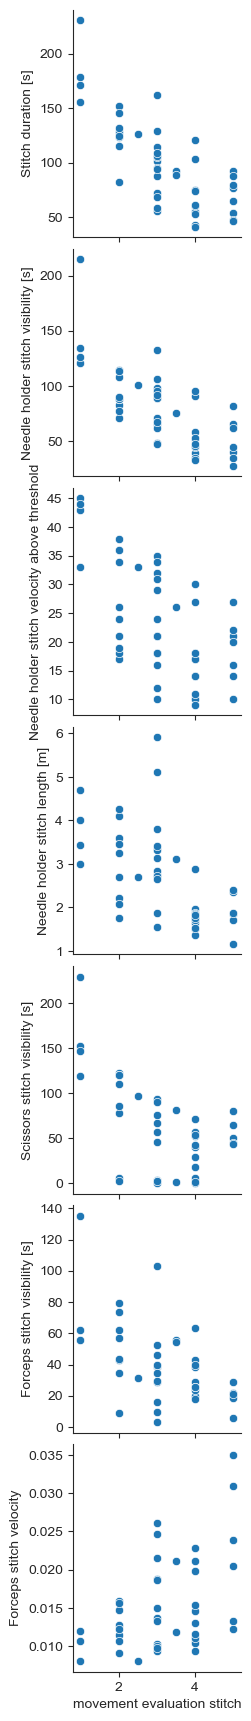

In [176]:

sns.pairplot(dfst, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=[relevant_column]
             )


In [177]:
# make interactive graph on hover display filename and stitch_id and control the width of the plot
import plotly.express as px
px.scatter(dfst, y="Needle holder stitch visibility [s]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)
# px.scatter(dfs, x="Needle holder stitch length [m]", y=relevant_column)


In [201]:

import plotly.express as px
px.scatter(dfst, y="Needle holder stitch length [m]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)


In [143]:
list(corr.index)

['Stitch duration [s]',
 'Needle holder stitch visibility [s]',
 'Needle holder stitch velocity above threshold',
 'Needle holder stitch length [m]',
 'Scissors stitch visibility [s]',
 'Forceps stitch visibility [s]',
 'Forceps stitch velocity']

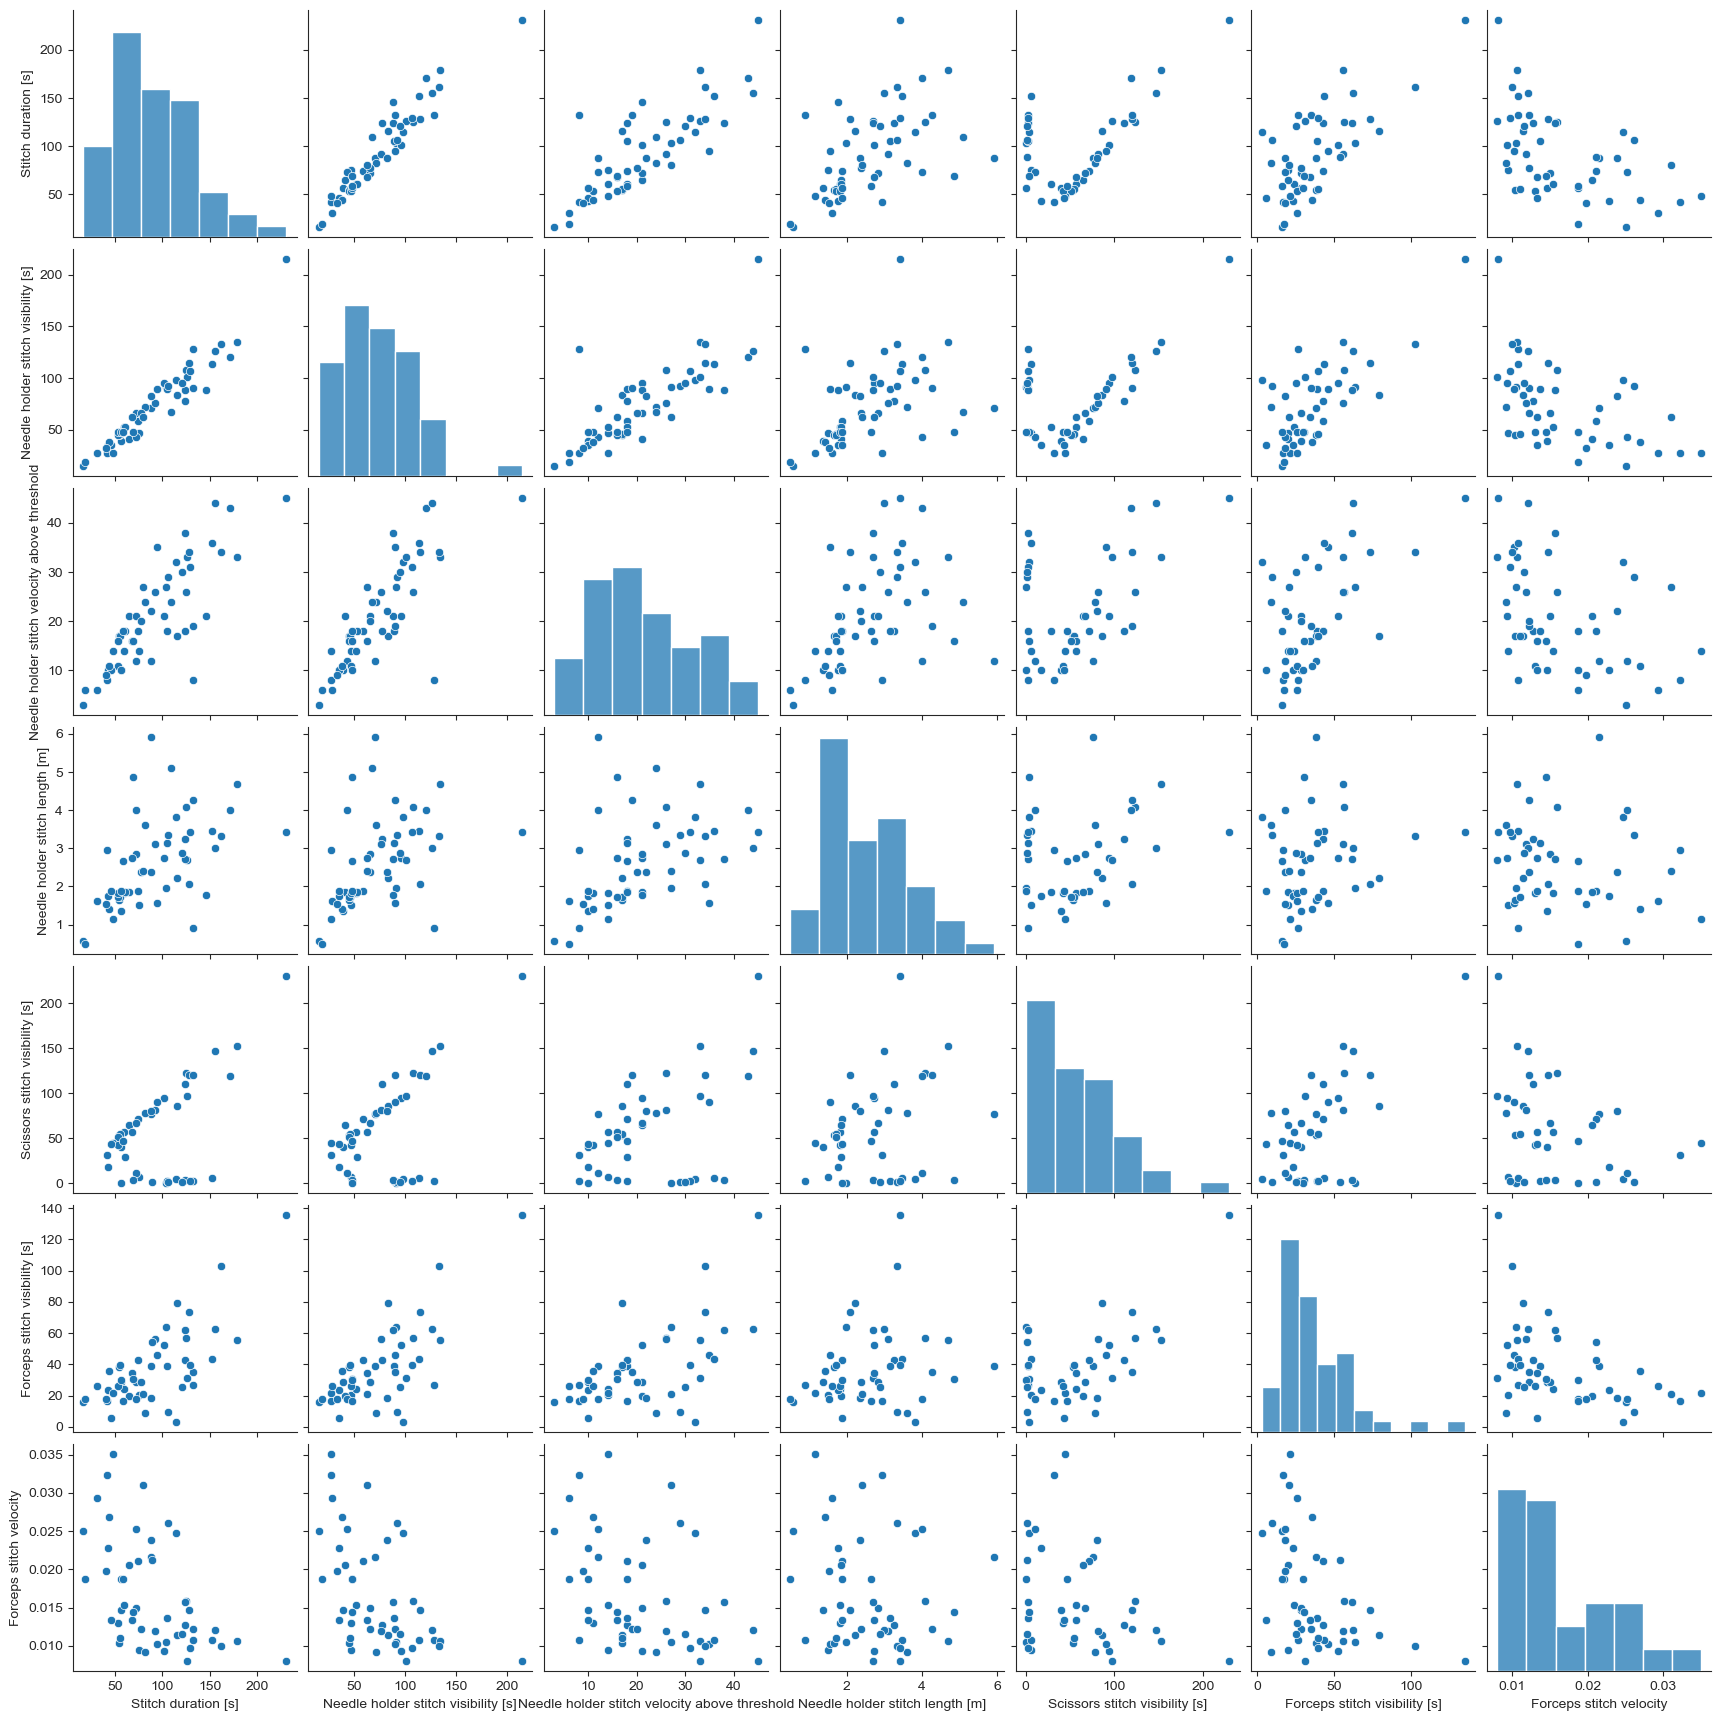

In [178]:

sns.pairplot(dfst, y_vars=list(corr.index),
             x_vars=list(corr.index),
             # x_vars=[relevant_column]
             )


In [50]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [51]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

In [52]:
# pretest_mean = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].mean()
# posttest_mean = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].mean()
# pretest_var = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].var()
# posttest_var = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].var()






In [53]:
# df_stats = pd.DataFrame({"pretest": pretest_mean, "posttest": posttest_mean, "pretest_var": pretest_var, "posttest_var": posttest_var})
# df_stats["diff"] = df_stats["pretest"] - df_stats["posttest"]
# df_stats

In [179]:
print(len(dfst))
dfst[cols_with_0 + [relevant_column]].notna().sum()

120


Stitch duration [s]                              58
Needle holder stitch visibility [s]              55
Needle holder stitch velocity above threshold    55
Needle holder stitch length [m]                  55
Scissors stitch visibility [s]                   46
Forceps stitch visibility [s]                    51
Forceps stitch velocity                          51
movement evaluation stitch                       53
dtype: int64

In [180]:
dfst[cols_with_0 + [relevant_column]]

,Stitch duration [s],Needle holder stitch visibility [s],Needle holder stitch velocity above threshold,Needle holder stitch length [m],Scissors stitch visibility [s],Forceps stitch visibility [s],Forceps stitch velocity,movement evaluation stitch
0,88.000000,70.800000,12.0,5.907214,76.266667,38.666667,0.021544,3.0
1,16.066667,15.000000,3.0,0.566725,NaN,16.066667,0.025056,NaN
2,131.866667,128.066667,8.0,0.904218,2.666667,26.733333,0.010819,NaN
3,41.600000,27.000000,8.0,2.948527,31.666667,16.666667,0.032273,NaN
4,75.000000,46.600000,14.0,1.509013,6.533333,20.066667,0.009389,4.0
...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,79.800000,62.266667,27.0,2.398493,NaN,20.933333,0.030994,5.0
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# ! pip install ace_tools

# Statistical testing

In [183]:
import pandas as pd
import scipy.stats as stats

# Columns to compare
# cols_with_0 = list(df_stats.index)  # Replace with your actual column names
# relevant_column = "is_pretest_num"



# DataFrames for each group
pretest_df = dfst[dfst[relevant_column] > 2.5][["filename"] + cols_with_0]
posttest_df = dfst[dfst[relevant_column] <= 2.5][["filename"] + cols_with_0]

# Ensure both dataframes are sorted by the same criteria to maintain pairing
pretest_df.sort_values(by="filename", inplace=True)
posttest_df.sort_values(by="filename", inplace=True)


# Perform t-tests
t_stats = []
p_values = []
col_names =[]
t_stats_less = []
p_values_less = []
col_names_less =[]
t_stats_greater = []
p_values_greater = []
col_names_greater =[]

data = {
    "col_name": [],
    "p_value_two-sided": [],
    "p_value_less": [],
    "p_value_greater": [],
    "t_stat_two-sided": [],
    "t_stat_less": [],
    "t_stat_greater": [],
}
for col in cols_with_0:
    try:
        data["col_name"].append(col)
        for alternative in ["two-sided", "less", "greater"]:
            
            t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative=alternative, nan_policy='omit')  # Assuming unequal variance
            data[f"t_stat_{alternative}"].append(t_stat)
            data[f"p_value_{alternative}"].append(p_value)
    except:
        print(col)
        import traceback
        traceback.print_exc()

# Collect the statistics in a DataFrame
print(data)
df_stats = pd.DataFrame(
    data
)


df_stats

{'col_name': ['Stitch duration [s]', 'Needle holder stitch visibility [s]', 'Needle holder stitch velocity above threshold', 'Needle holder stitch length [m]', 'Scissors stitch visibility [s]', 'Forceps stitch visibility [s]', 'Forceps stitch velocity'], 'p_value_two-sided': [9.759667615428744e-06, 0.00045856482247043297, 0.001383796573035019, 0.013569151023427066, 0.0016872429147858118, 0.024279164117281125, 0.0011956088837685897], 'p_value_less': [4.879833807714372e-06, 0.00022928241123521648, 0.0006918982865175095, 0.006784575511713533, 0.0008436214573929059, 0.012139582058640562, 0.9994021955581157], 'p_value_greater': [0.9999951201661923, 0.9997707175887648, 0.9993081017134825, 0.9932154244882865, 0.9991563785426071, 0.9878604179413594, 0.0005978044418842948], 't_stat_two-sided': [-5.909887609723826, -4.23374558271955, -3.7156359486720314, -2.626704674172919, -3.8123075072915813, -2.51537871381484, 3.4830102260969955], 't_stat_less': [-5.909887609723826, -4.23374558271955, -3.7156

,col_name,p_value_two-sided,p_value_less,p_value_greater,t_stat_two-sided,t_stat_less,t_stat_greater
0,Stitch duration [s],0.000010,0.000005,0.999995,-5.909888,-5.909888,-5.909888
1,Needle holder stitch visibility [s],0.000459,0.000229,0.999771,-4.233746,-4.233746,-4.233746
2,Needle holder stitch velocity above threshold,0.001384,0.000692,0.999308,-3.715636,-3.715636,-3.715636
3,Needle holder stitch length [m],0.013569,0.006785,0.993215,-2.626705,-2.626705,-2.626705
4,Scissors stitch visibility [s],0.001687,0.000844,0.999156,-3.812308,-3.812308,-3.812308
5,Forceps stitch visibility [s],0.024279,0.012140,0.987860,-2.515379,-2.515379,-2.515379
6,Forceps stitch velocity,0.001196,0.999402,0.000598,3.483010,3.483010,3.483010


In [184]:
pretest_df.mean()


C:\Users\Jirik\AppData\Local\Temp\ipykernel_3416\3326586540.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Stitch duration [s]                              80.070370
Needle holder stitch visibility [s]              64.882828
Needle holder stitch velocity above threshold    19.757576
Needle holder stitch length [m]                   2.456015
Scissors stitch visibility [s]                   40.668966
Forceps stitch visibility [s]                    32.806452
Forceps stitch velocity                           0.016770
dtype: float64

In [185]:
posttest_df.mean()

C:\Users\Jirik\AppData\Local\Temp\ipykernel_3416\3993572716.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Stitch duration [s]                              142.138095
Needle holder stitch visibility [s]              109.504762
Needle holder stitch velocity above threshold     30.785714
Needle holder stitch length [m]                    3.233446
Scissors stitch visibility [s]                   106.841026
Forceps stitch visibility [s]                     57.222222
Forceps stitch velocity                            0.011778
dtype: float64

## Find general correlation



In [74]:
# cols

In [75]:
# list(cols)

In [76]:
# try to find the best columns to predict stars_auto


# corr = dfs.corr(numeric_only=True)
# numeric_cols = corr.columns[corr.columns.str.contains("annotation_annotation")]
# corr = corr[numeric_cols].abs()# .sort_values(by="annotation_annotation_stars", ascending=False).head(10)
# # keep just rows not containing "annotation_annotation" in the index
# corr = corr[~corr.index.str.contains("annotation_annotation")]
# 
# # [list(cols)].abs()# .sort_values(ascending=False).head(10)
# # corr = corr[corr.index != "stars_auto"] 
# 
# corr

In [77]:
# argmax in dataframe
corr.loc[corr.idxmax()]

0.719249333903006

In [78]:
# dfs[["annotation_annotation_knots_are_done_right", 'filename']]

# Train predictor

In [186]:
print(corr.shape)
corr = corr.dropna()
print(corr.shape)


(7,)
(7,)


In [187]:
corr.index

Index(['Stitch duration [s]', 'Needle holder stitch visibility [s]',
       'Needle holder stitch velocity above threshold',
       'Needle holder stitch length [m]', 'Scissors stitch visibility [s]',
       'Forceps stitch visibility [s]', 'Forceps stitch velocity'],
      dtype='object')

In [188]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
# sample_id_cols = ["filename", "stitch_id"]
#train a model to predict stars_auto

predicted_columns = [relevant_column]  # list(corr.columns[corr.columns.str.contains("is_pretest_num")])
# columns = list(corr.index[~corr.index.str.contains(relevant_column)])
columns = cols_with_0 + sample_id_cols
# columns = list(corr.index)
# columns.append("filename")
print(predicted_columns)
print(columns)



['movement evaluation stitch']
['Stitch duration [s]', 'Needle holder stitch visibility [s]', 'Needle holder stitch velocity above threshold', 'Needle holder stitch length [m]', 'Scissors stitch visibility [s]', 'Forceps stitch visibility [s]', 'Forceps stitch velocity', 'filename', 'stitch_id']


### Remove NA values

In [189]:
# remove known problematic columns

# # remove row with index 1708
# if 1708 in dfs.index:
#     dfs = dfs.drop(1708)
# 
# if 1667 in dfs.index:
#     dfs = dfs.drop(1667)
# 
# # remove "qr_data_pix_size_single_frame_detector_m" from the columns
# if "qr_data_pix_size_single_frame_detector_m" in columns:
#     columns.remove("qr_data_pix_size_single_frame_detector_m")

# dfs[cols].isna().sum()


In [190]:
dfst[["filename", "stitch_id"] + columns]

,filename,stitch_id,Stitch duration [s],Needle holder stitch visibility [s],Needle holder stitch velocity above threshold,Needle holder stitch length [m],Scissors stitch visibility [s],Forceps stitch visibility [s],Forceps stitch velocity,filename,stitch_id
0,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,0,88.000000,70.800000,12.0,5.907214,76.266667,38.666667,0.021544,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,0
1,donati_luis.mov,0,16.066667,15.000000,3.0,0.566725,NaN,16.066667,0.025056,donati_luis.mov,0
2,Screen_Recording_20240221_150510_Zoom.mp4,0,131.866667,128.066667,8.0,0.904218,2.666667,26.733333,0.010819,Screen_Recording_20240221_150510_Zoom.mp4,0
3,11.4.2024.HarmsSören.NHT.mp4,0,41.600000,27.000000,8.0,2.948527,31.666667,16.666667,0.032273,11.4.2024.HarmsSören.NHT.mp4,0
4,Pre_-Test_Isabel_Linden.mp4,0,75.000000,46.600000,14.0,1.509013,6.533333,20.066667,0.009389,Pre_-Test_Isabel_Linden.mp4,0
...,...,...,...,...,...,...,...,...,...,...,...
115,Medium-Schweinefu_.mp4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium-Schweinefu_.mp4,3
116,Stresstest_Einzelknopfnaht.mp4,3,79.800000,62.266667,27.0,2.398493,NaN,20.933333,0.030994,Stresstest_Einzelknopfnaht.mp4,3
117,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,3
118,"Gehrke,Yves - post.mp4",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gehrke,Yves - post.mp4",3


In [191]:

# count NA values in columns

dfst[columns].isna().sum().sort_values(ascending=False)


Scissors stitch visibility [s]                   74
Forceps stitch visibility [s]                    69
Forceps stitch velocity                          69
Needle holder stitch visibility [s]              65
Needle holder stitch velocity above threshold    65
Needle holder stitch length [m]                  65
Stitch duration [s]                              62
filename                                          0
stitch_id                                         0
dtype: int64

In [109]:
dfst[columns].isna().sum(axis=1).sort_values(ascending=False)

2562    0
2563    0
2596    0
2595    0
2594    0
       ..
2567    0
2566    0
2565    0
2564    0
2597    0
Length: 120, dtype: int64

In [192]:
dfsc = dfst[
    dfst["Stitch duration [s]"].notna() &
    dfst["Needle holder stitch visibility [s]"].notna() &
    dfst[predicted_columns[0]].notna()
    # dfs[predicted_columns].notna()
]
display(dfsc)

dfsc[columns].isna().sum().sort_values(ascending=False)

display(dfsc[columns].isna().sum().sort_values(ascending=False))

# fill 0 instead of None
dfsc = dfsc[sample_id_cols + predicted_columns + cols_with_0].copy()
dfsc[cols_with_0] = dfsc[cols_with_0].fillna(0)

print(len(dfsc))

,filename,annotation_annotation_annotation,Needle holder stitch length [m],Needle holder stitch visibility [s],Needle holder stitch velocity,Needle holder stitch unit,Needle holder stitch visibility [%],Needle holder stitch area presence [%],Forceps stitch length [m],Forceps stitch visibility [s],...,Stitch1 start at [s],Stitch2 duration [s],Stitch2 duration [%],Stitch2 start at [s],Stitch3 duration [s],Stitch3 duration [%],Stitch3 start at [s],Stitch4 duration [s],Stitch4 duration [%],Stitch4 start at [s]
0,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,00:00:00 no clear view of the setup\r\n00:00:1...,5.907214,70.800000,0.078755,m,80.454545,40.866290,0.984521,38.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pre_-Test_Isabel_Linden.mp4,00:00:09 stitch_start\r\n00:00:47 knot_start\r...,1.509013,46.600000,0.020504,m,62.133333,77.253219,0.320440,20.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fehringer_Pascal__post_test.mp4,00:00:02 stitch_start\r\n00:00:38 knot_start\r...,3.598281,71.533333,0.041703,m,87.235772,49.580615,0.188940,8.933333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Hilger,Anke-Posttest.mp4",00:00:06 stitch_start\r\n00:00:45 knot\r\n00:0...,1.361027,39.400000,0.025297,m,70.357143,69.712352,0.553835,28.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bad-03_11_21_B_Hopfe_Johanna_Einzelknopfnaht.mp4,00:00:00 setup could be cleaner\r\n00:00:07 ne...,1.969100,91.400000,0.016650,m,88.337629,85.120350,1.007100,63.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4,00:00:33 needle grabbed pretty far in the back...,3.425421,214.800000,0.014369,m,93.094481,79.236499,1.253919,135.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...,00:00:17 needle is put on skin in wrong angle\...,3.811671,97.933333,0.031180,m,85.655977,67.801225,0.109430,3.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,00:00:08 thumb is not taken out of the needle ...,4.091873,108.000000,0.029875,m,86.770220,76.049383,1.301980,56.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,00:00:07 direction of suturing is wrong\r\n00:...,2.736359,95.466667,0.025329,m,94.148586,67.388268,0.598491,52.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...,00:00:14 thumb is not taken out of needle hold...,2.226574,83.200000,0.016469,m,72.055427,88.541667,1.163955,79.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Scissors stitch visibility [s]                   6
Forceps stitch visibility [s]                    5
Forceps stitch velocity                          5
Stitch duration [s]                              0
Needle holder stitch visibility [s]              0
Needle holder stitch velocity above threshold    0
Needle holder stitch length [m]                  0
filename                                         0
stitch_id                                        0
dtype: int64

47


In [193]:
# dfsc[predicted_columns].isna()

In [194]:
predicted_columns

['movement evaluation stitch']

In [195]:
columns

['Stitch duration [s]',
 'Needle holder stitch visibility [s]',
 'Needle holder stitch velocity above threshold',
 'Needle holder stitch length [m]',
 'Scissors stitch visibility [s]',
 'Forceps stitch visibility [s]',
 'Forceps stitch velocity',
 'filename',
 'stitch_id']

In [206]:

results = {}
for predicted_column in predicted_columns:
# if True:
#     predicted_column = "annotation_annotation_stars"
    cols = columns.copy()
    cols.append(predicted_column)

    dfsx = dfsc[cols].copy()
    l1 = len(dfsx)
    dfsx = dfsx.dropna()
    l2 = len(dfsx)
    assert l1 == l2, "There are still NA values in the data"
    X = dfsx[columns].drop(sample_id_cols, axis=1)
    # X = X.drop(predicted_column, axis=1)
    y = dfsx[predicted_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = SVR()
    # clf.fit(X_train, y_train)
    # clf.score(X_test, y_test)
    # 
    # X
    # from sklearn.neural_network import MLPClassifier
    # # X = [[0., 0.], [1., 1.]]
    # # y = [0, 1]
    # clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(5, 2), random_state=1)

    # train regresion
    # clf = LinearRegression()
    from sklearn.neural_network import MLPRegressor
    # clf = MLPRegressor(random_state=1, max_iter=500)

    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    pred_test = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    results[predicted_column] = {"score": clf.score(X_test, y_test), "model": clf}
    print(predicted_column, clf.score(X_test, y_test))



movement evaluation stitch 0.1619350140967536


In [203]:
results

{'movement evaluation stitch': {'score': 0.1619350140967536, 'model': SVR()}}

In [204]:
np.asarray(list(zip(pred_test, y_test)))

array([[3.19594519, 2.        ],
       [4.01149397, 3.        ],
       [3.24721415, 3.        ],
       [3.97211982, 4.        ],
       [3.8219314 , 3.        ],
       [4.08874372, 5.        ],
       [3.40759724, 3.        ],
       [4.08072227, 4.        ],
       [3.47742109, 4.        ],
       [3.94689981, 3.        ]])

<AxesSubplot: xlabel='predicted', ylabel='real'>

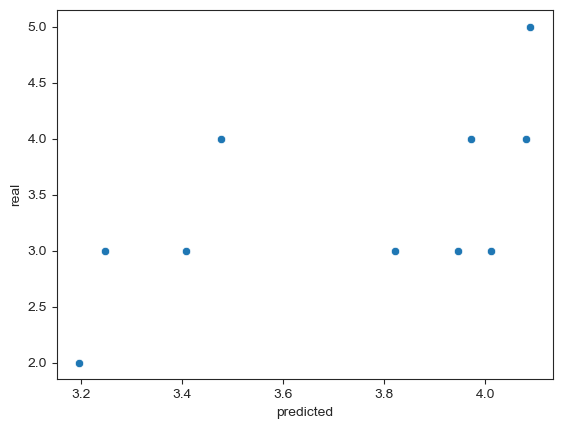

In [208]:
df_test = pd.DataFrame(np.asarray(list(zip(pred_test, y_test))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, x="predicted", y="real")

<AxesSubplot: xlabel='predicted', ylabel='real'>

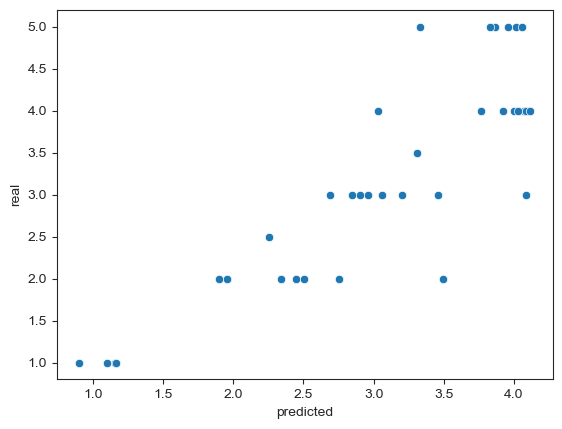

In [207]:

df_test = pd.DataFrame(np.asarray(list(zip(pred_train, y_train))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, x="predicted", y="real")


## Score

In [116]:
clf.score(X_test, y_test)

0.5

In [30]:
clf.score(X_train, y_train)

NameError: name 'clf' is not defined

## Check the předictions

In [149]:
y_test

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [150]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 0])

In [113]:
clf.predict(X_train)


array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1])

In [114]:
y_train

933    1
945    0
926    2
942    2
944    2
947    2
925    2
934    0
948    0
927    2
940    0
931    1
938    1
943    0
930    1
Name: stars_auto, dtype: int32

In [117]:

# sns.histplot(dfs, x="n_stitches_by_user")
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 0 area presence [%]',
       'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]',
       'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=218)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

816    2
842    0
840    0
822    2
Name: stars_auto, dtype: int32

<AxesSubplot: xlabel='n_stitches_by_user', ylabel='Count'>

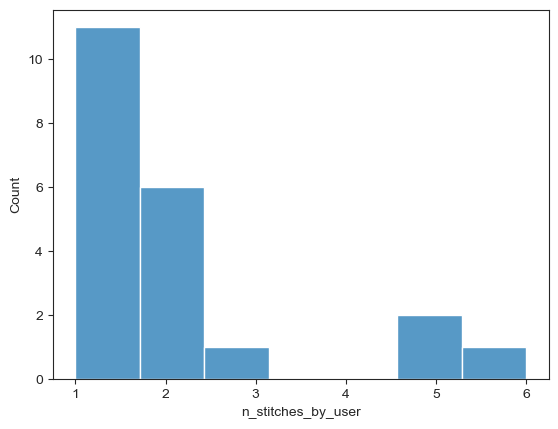

In [146]:
sns.histplot(dfs, x="n_stitches_by_user", 
             # hue="stars_auto"
             )